In [100]:
import pandas as pd
import numpy as np
import datetime
import importlib
import pickle

import data_utils
import model_utils
import train_utils
import evaluation
import submission
importlib.reload(data_utils)
importlib.reload(model_utils)
importlib.reload(train_utils)
importlib.reload(evaluation)
importlib.reload(submission)

import torch
import torch.nn as nn
from matplotlib import pyplot as plt

### For writing hw2 report 

In [93]:
df = pd.read_csv("./data/hw2_train.csv")
df_val = pd.read_csv("./hw2_utterance_dev.txt", header=None)
df_test = pd.read_csv("./hw2_utterance_test.txt", header=None)

In [124]:
vocab = np.load("./data/vocab.npy")

In [127]:
df

,utterances,IOB Slot tags,len
0,who plays luke on star wars new hope,O O B_char O B_movie I_movie I_movie I_movie,8
1,show credits for the godfather,O O O B_movie I_movie,5
2,who was the main actor in the exorcist,O O O O O O B_movie I_movie,8
3,find the female actress from the movie she 's ...,O O O O O O O B_movie I_movie I_movie I_movie,11
4,who played dory on finding nemo,O O B_char O B_movie I_movie,6
5,who was the female lead in resident evil,O O O O O O B_movie I_movie,8
6,who played guido in life is beautiful,O O B_char O B_movie I_movie I_movie,7
7,who was the co-star in shoot to kill,O O O O O B_movie I_movie I_movie,8
8,find the guy who plays charlie on charlie 's a...,O O O O O B_char O B_movie I_movie,10
9,cast and crew of movie the campaign,O O O O O B_movie I_movie,7


In [126]:
vocab[:10]

array(['<pad>', '<unk>', "'re", "'s", "'t", '-', '-a', '-rated', '1000',
       '13'], dtype='<U14')

In [104]:
df["len"] = df.utterances.apply(lambda x:len(x.split(" ")))
bar = df.len.value_counts()

In [106]:
list(bar)

[368, 346, 343, 317, 239, 225, 160, 99, 62, 55, 44, 17, 17, 8, 4, 4, 2, 1, 1]

In [109]:
bar.index

Int64Index([6, 4, 5, 7, 8, 3, 9, 10, 11, 2, 12, 13, 14, 15, 1, 16, 17, 18, 21], dtype='int64')

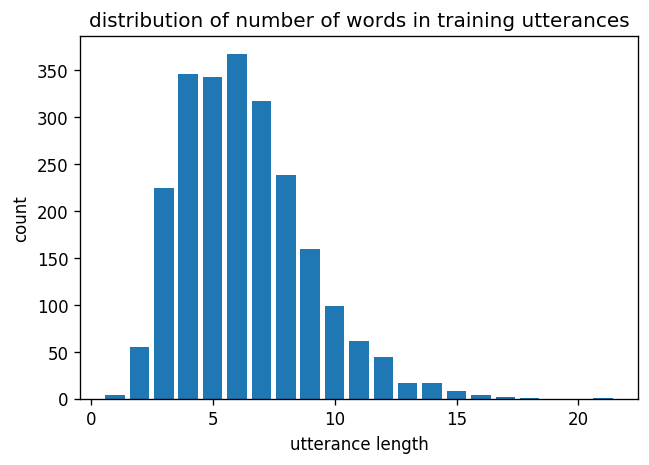

In [116]:
plt.figure(dpi=120)
plt.bar(x=list(bar.index), height=list(bar))
plt.xlabel("utterance length")
plt.ylabel("count")
plt.title("distribution of number of words in training utterances")
plt.show()

### Training 

In [76]:
file_dict = {"train": "./data/train_real.csv", 
             "val_text": "./hw2_utterance_dev.txt",
             "val_label": "./hw2_tags_dev.txt",
             "test_text": "./hw2_utterance_test.txt",
             "holdout": "./data/holdout.csv"}


train_data, val_data, info = data_utils.prep_all_data(
    file_dict, batch_size=1, device="cuda")

In [77]:
importlib.reload(model_utils)
m = model_utils.GRU(info, direction=1).cuda()
train_data, val_data, info = data_utils.prep_all_data(
    file_dict, batch_size=1, device="cuda")
result = train_utils.train(train_data, val_data, m)

Epoch: 0, LR: 0.001, Train Loss: 2.8845, Val Loss: 2.7218, Val f1 0.738
Epoch: 1, LR: 0.001, Train Loss: 0.7926, Val Loss: 2.6508, Val f1 0.723
Epoch: 2, LR: 0.001, Train Loss: 0.4316, Val Loss: 2.9778, Val f1 0.734
Epoch: 3, LR: 0.001, Train Loss: 0.3251, Val Loss: 2.9525, Val f1 0.719
Epoch: 4, LR: 0.001, Train Loss: 0.2720, Val Loss: 3.2743, Val f1 0.747
Epoch: 5, LR: 0.001, Train Loss: 0.2432, Val Loss: 3.4590, Val f1 0.726
Epoch: 6, LR: 0.001, Train Loss: 0.1914, Val Loss: 3.6050, Val f1 0.721
Epoch: 7, LR: 0.001, Train Loss: 0.1868, Val Loss: 3.7428, Val f1 0.721
Epoch: 8, LR: 0.001, Train Loss: 0.1828, Val Loss: 3.9034, Val f1 0.739
Epoch: 9, LR: 0.001, Train Loss: 0.1614, Val Loss: 3.8628, Val f1 0.743
Epoch: 10, LR: 0.001, Train Loss: 0.1622, Val Loss: 3.6930, Val f1 0.738
Epoch: 11, LR: 0.001, Train Loss: 0.1470, Val Loss: 3.8276, Val f1 0.741
Epoch: 12, LR: 0.0001, Train Loss: 0.1280, Val Loss: 3.8207, Val f1 0.760
Epoch: 13, LR: 0.0001, Train Loss: 0.1145, Val Loss: 3.8603,

In [82]:
importlib.reload(model_utils)
importlib.reload(train_utils)
train_data, val_data, info = data_utils.prep_all_data(
    file_dict, batch_size=-1, device="cuda")
m = model_utils.GRU(info, direction=1).cuda()
result = train_utils.train(train_data, val_data, m)

Epoch: 0, LR: 0.001, Train Loss: 194.8424, Val Loss: 131.8374, Val f1 0.352, epoch time: 0.2s
Epoch: 1, LR: 0.001, Train Loss: 74.9705, Val Loss: 105.7667, Val f1 0.572, epoch time: 0.2s
Epoch: 2, LR: 0.001, Train Loss: 44.4152, Val Loss: 84.4276, Val f1 0.662, epoch time: 0.2s
Epoch: 3, LR: 0.001, Train Loss: 29.3650, Val Loss: 63.5629, Val f1 0.694, epoch time: 0.2s
Epoch: 4, LR: 0.001, Train Loss: 20.0317, Val Loss: 58.8250, Val f1 0.715, epoch time: 0.2s
Epoch: 5, LR: 0.001, Train Loss: 14.6342, Val Loss: 60.3211, Val f1 0.716, epoch time: 0.2s
Epoch: 6, LR: 0.001, Train Loss: 11.6402, Val Loss: 59.1600, Val f1 0.734, epoch time: 0.2s
Epoch: 7, LR: 0.001, Train Loss: 9.5209, Val Loss: 57.5627, Val f1 0.740, epoch time: 0.2s
Epoch: 8, LR: 0.001, Train Loss: 7.7870, Val Loss: 56.5232, Val f1 0.760, epoch time: 0.2s
Epoch: 9, LR: 0.001, Train Loss: 6.4603, Val Loss: 56.5879, Val f1 0.756, epoch time: 0.2s
Epoch: 10, LR: 0.001, Train Loss: 5.6119, Val Loss: 58.1507, Val f1 0.752, epoch

In [83]:
importlib.reload(model_utils)
importlib.reload(train_utils)
train_data, val_data, info = data_utils.prep_all_data(
    file_dict, batch_size=-1, device="cuda")
m = model_utils.GRU(info, direction=2).cuda()
result = train_utils.train(train_data, val_data, m)

RuntimeError: Input batch size 1 doesn't match hidden batch size 3

In [70]:
486 * 2/36

27.0

In [3]:
importlib.reload(model_utils)
m = model_utils.GRU(info, direction=2).cuda()
result = train_utils.train(train_data, val_data, m)

Epoch: 0, LR: 0.001, Train Loss: 2.4104, Val Loss: 2.6255, Val f1 0.714
Epoch: 1, LR: 0.001, Train Loss: 0.4522, Val Loss: 2.1465, Val f1 0.764
Epoch: 2, LR: 0.001, Train Loss: 0.1908, Val Loss: 2.1976, Val f1 0.787
Epoch: 3, LR: 0.001, Train Loss: 0.1224, Val Loss: 2.3299, Val f1 0.791
Epoch: 4, LR: 0.001, Train Loss: 0.0878, Val Loss: 2.7668, Val f1 0.786
Epoch: 5, LR: 0.001, Train Loss: 0.0662, Val Loss: 2.8125, Val f1 0.805
Epoch: 6, LR: 0.001, Train Loss: 0.0486, Val Loss: 2.8417, Val f1 0.808
Epoch: 7, LR: 0.001, Train Loss: 0.0381, Val Loss: 3.0598, Val f1 0.793
Epoch: 8, LR: 0.001, Train Loss: 0.0446, Val Loss: 3.0771, Val f1 0.799
Epoch: 9, LR: 0.001, Train Loss: 0.0297, Val Loss: 3.2020, Val f1 0.805
Epoch: 10, LR: 0.001, Train Loss: 0.0285, Val Loss: 3.3087, Val f1 0.796
Epoch: 11, LR: 0.001, Train Loss: 0.0511, Val Loss: 3.7601, Val f1 0.774
Epoch: 12, LR: 0.0001, Train Loss: 0.0183, Val Loss: 4.0560, Val f1 0.782
Epoch: 13, LR: 0.0001, Train Loss: 0.0187, Val Loss: 4.0025,

In [8]:
torch.save(result["trained_model"], "./data/model_checkpoints/biGRU_Feb23.mdl")

### Ensemble

### Generate submission file

In [6]:
submission.get_submission(model=result["trained_model"], data=val_data)

prediction file saved to: prediction.txt
